<a href="https://colab.research.google.com/github/Patotricks15/Data-Science-and-Statistics/blob/master/Mortes_por_acidentes_de_transito_em_SP(2015-2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACIDENTES FATAIS NO ESTADO DE SÃO PAULO (2015-2020)**

#**INTRODUÇÃO**

---

Muito se tem discutido acerca do problema da mobilidade urbana em SP. E nessa análise exploratória iremos explorar uma parte importante do assunto: **os acidentes fatais.**


Antes de tudo, gostaria de deixar claro que esses números de mortes não são **apenas** números, são pessoas, famílias, amigos e histórias que hoje estão só nas memórias de seus entes queridos. Gostaria de deixar aqui nessa conclusão um pedido de conscientização sobre acidentes que ocorrem no trânsito e um luto em respeito às famílias, amigos e pessoas próximas.

Quando trabalhamos com dados, temos um panorama geral do que está acontecendo e do que aconteceu, e a importância de trabalhar com dados em cima desse assunto é podermos cobrar políticas públicas para a redução do problema, no caso, **as mortes por acidentes no Estado de São Paulo.**

Obs1: Não tratarei da média anual de mortes ocasionadas por esses acidentes, mas sim do total de mortes que ocorreram nos últimos cinco anos.

Obs2: Escolhi a cor preta para alguns gráficos (os que não precisei reutilizar as cores) como forma de prestar LUTO. 

A base de dados utilizada se encontra em: http://www.respeitoavida.sp.gov.br/

# **ANALISANDO OS DADOS**

---
Limpeza e estruturação dos dados


O primeiro passo é importar as bibliotecas

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Depois chamamos os dados e visualizamos o conjunto de dados

In [95]:
df = pd.read_csv('acidentes_sp_clean.csv')
df.head()

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,Ano/Mês do Óbito,Dia da Semana,Hora do Acidente,Turno,Município,Região Administrativa,Logradouro,Númeral / KM,Jurisdição,Administração,Conservação,Tipo do local da ocorrência,LAT_(GEO),LONG_(GEO),Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Tempo entre o Acidente e o óbito,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido
0,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,2020.04,QUINTA,17:30:00,TARDE,ARACARIGUAMA,Sorocaba,SP 280,"50,0",ESTADUAL,CONCESSIONÁRIA,VIAOESTE,PUBLICO,-23.439186,-47.065945,ONIBUS,CONDUTOR,VIA,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,45-49,48.0,ONIBUS
1,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,2020.04,QUINTA,17:30:00,TARDE,ARACARIGUAMA,Sorocaba,SP 280,"50,0",ESTADUAL,CONCESSIONÁRIA,VIAOESTE,PUBLICO,-23.439186,-47.065945,ONIBUS,PASSAGEIRO,ESTABELECIMENTO DE SAUDE,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,35-39,36.0,ONIBUS
2,110429,3887,2020,2020-04-30,2020-04-17,Rodovias,30,4,ABRIL,2020,2020.04,SEXTA,3:50:00,MADRUGADA,SAO JOSE DO RIO PRETO,São José do Rio Preto,BR 153,"57,5",FEDERAL,CONCESSIONÁRIA,TRANSBRASILIANA,PUBLICO,-20.772532,-49.350863,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,CHOQUE,DEFENSA / BARREIRA,Até 30 dias,MASCULINO,25-29,26.0,NÃO HÁ
3,30309,1745,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,2020.04,QUINTA,18:30:00,NOITE,SUZANO,Metropolitana de São Paulo,SP 021,"110,0",ESTADUAL,CONCESSIONÁRIA,SPMAR,PUBLICO,-23.566580,-46.342199,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,Mesmo dia,MASCULINO,NAO DISPONIVEL,NaN,AUTOMOVEL
4,70923,1373,2020,2020-04-30,2020-04-30,Vias Municipais,30,4,ABRIL,2020,2020.04,QUINTA,17:50:00,TARDE,LIMEIRA,Campinas,RUA ITAPEMA,"481,0",MUNICIPAL,PREFEITURA,PREFEITURA,PUBLICO,-22.552483,-47.405759,BICICLETA,CONDUTOR,VIA,CHOQUE,MURO/PAREDE/TALUDE,Mesmo dia,FEMININO,30-34,30.0,NÃO HÁ


In [96]:
df.shape # Ver número de linhas e colunas

(30571, 34)

In [97]:
df.info() #Informações sobre os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30571 entries, 0 to 30570
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id da Delegacia (RDO)             30571 non-null  int64  
 1   Número do Bo (RDO)                30571 non-null  int64  
 2   Ano do BO (RDO)                   30571 non-null  int64  
 3   Data do Óbito                     30571 non-null  object 
 4   Data do Acidente                  30571 non-null  object 
 5   Tipo de via                       30571 non-null  object 
 6   Dia do óbito                      30571 non-null  int64  
 7   Mês do Óbito                      30571 non-null  int64  
 8   Mês Óbito Descrição               30571 non-null  object 
 9   Ano do Óbito                      30571 non-null  int64  
 10  Ano/Mês do Óbito                  30571 non-null  float64
 11  Dia da Semana                     30571 non-null  object 
 12  Hora

Aqui eu removemos os dados que não quero que apareçam, que são os "NAO DISPONIVEL" em algumas colunas.
Depois eu escolheremos as paletas e as cores que serão usadas ao longo da análise exploratória.

**Paletas:** https://seaborn.pydata.org/tutorial/color_palettes.html


**Cores:** https://celke.com.br/artigo/tabela-de-cores-html-nome-hexadecimal-rgb





In [0]:
df_remove_genero = df.loc[(df['Sexo'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_genero.index)

df_remove_veiculo = df.loc[(df['Tipo do veículo da vítima'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_veiculo.index)

df_remove_vitima = df.loc[(df['Tipo de vítima'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_vitima.index)

df_remove_acidente = df.loc[(df['Tipo de acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_acidente.index)

df_remove_sub_acidente = df.loc[(df['Sub Tipo do Acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_sub_acidente.index)
#Cores
cores_hora = ['#FFD700','#FFD700','#8B0000','#FFD700','#C0C0C0']
cores_dia = ['#8B0000','#FFD700','#FFD700','#FFD700','#FFD700','#FFA500','#8B0000']
cores_genero = ['#87CEFA','#FF69B4']
cores_tipo_vitima = ["#9b59b6", "#e74c3c", "#2ecc71"]

#Paletas
paleta_tipo_veiculo = sns.color_palette("husl", 7)
paleta_degrade=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.75, reverse=True)
paleta_hora = sns.color_palette(cores_hora)
paleta_tipo_vitima = sns.color_palette(cores_tipo_vitima)
paleta_genero = sns.color_palette(cores_genero)
paleta_dia = sns.color_palette(cores_dia)


Quando analisamos um problema social devemos fazer muitas perguntas, porque geralmente são problemas complexos que resultaram de inúmeros fatores e que afetam inúmeras pessoas. Então dado as limitações do nosso conjunto de dados, responderei quatro perguntas:

*  QUEM?
*  ONDE?
*  QUANDO?
*  COMO?









# **COM QUEM ACONTECEM?**

---
Entender **quem** são as pessoas envolvidas no problema social em que estamos analisando é o primeiro passo para pensarmos em resolvê-lo, podendo direcionar o foco das políticas públicas e/ou da conscientização.
Olhando nosso dataset, vemos que as informações sobre as vítimas são:

*   Gênero
*   Idade
*   Tipo de vítima
*   Veículo em que estavam

##    Gênero






In [0]:
sexo = df['Sexo'].value_counts()
sexo['MASCULINO'] + sexo['FEMININO']
homens = sexo['MASCULINO']
mulheres = sexo['FEMININO']

In [100]:
masc_porc = sexo['MASCULINO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100
femi_porc = sexo['FEMININO']/(sexo['MASCULINO'] + sexo['FEMININO'])*100
print('Homens: {} ({:.2f}%)'.format(homens,masc_porc))
print('Mulheres: {} ({:.2f}%)'.format(mulheres,femi_porc))

Homens: 19997 (81.39%)
Mulheres: 4571 (18.61%)


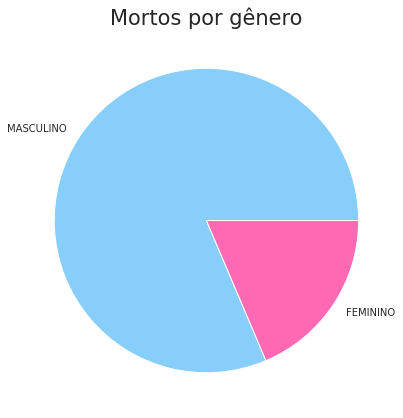

In [101]:
fig = plt.figure(figsize=(7,7))
sns.set_style('ticks')
sexo = df['Sexo'].value_counts()
sexo_num = [sexo[0],sexo[1]]
plt.pie(sexo_num, labels=['MASCULINO','FEMININO'],colors=paleta_genero)
plt.title('Mortos por gênero',fontsize=21);

Agora já sabemos que as maiores vítimas dos acidentes de trânsito em São Paulo são os homens. Mas que homens?

Os dados nos permitem também analisar a **distribuição das idades**.



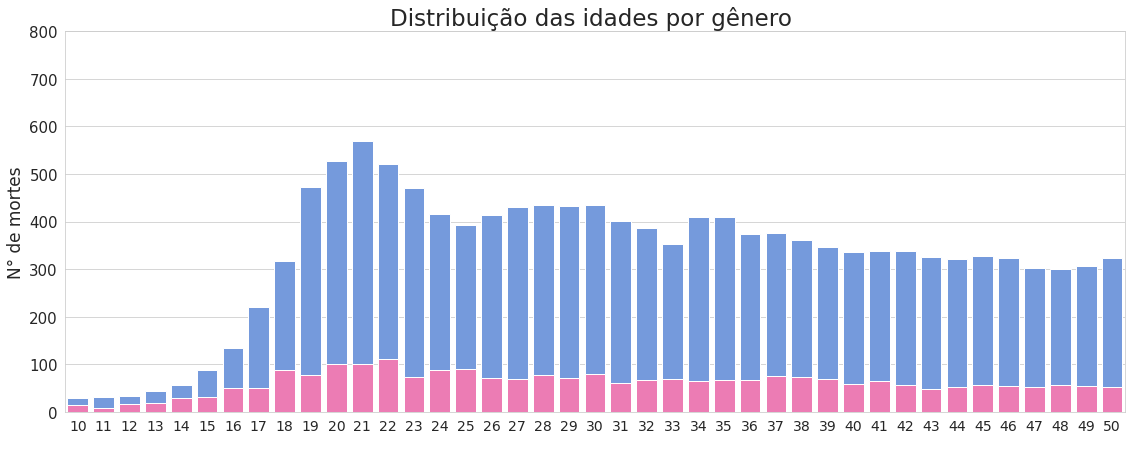

In [102]:
fig = plt.figure(figsize=(19,7))
sns.set_style('whitegrid')
df['idade_homem'] = df[df['Sexo'] == 'MASCULINO']['Idade da vítima'] #idade das vitimas masculinas
df['idade_homem'] = df['idade_homem'].values.astype(int) #Transformar em int
df['idade_mulher'] = df[df['Sexo'] == 'FEMININO']['Idade da vítima'] #idade das vitimas femininas
df['idade_mulher'] = df['idade_mulher'].values.astype(int)
sns.countplot('idade_homem',color='#6495ED',data=df)
sns.countplot('idade_mulher',color='#FF69B4',data=df)
plt.xlim(10.5,51.5)
plt.xlabel(' ')
plt.ylabel('N° de mortes',fontsize=17)
plt.ylim(0,800)
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.title('Distribuição das idades por gênero ',fontsize=23);

Como podemos observar, os que mais morrem estão entre os 19 e 23 anos de idade. E depois disso, não varia muito, tendo sua media igual a 40,75 anos (sim, a estatística nos permite isso) para os homens e 43,95 anos para as mulheres.


```
df[df['Sexo'] == 'FEMININO']['Idade da vítima'].mean() #Média da idade feminina
df[df['Sexo'] == 'MASCULINO']['Idade da vítima'].mean() #Média da idade masculina
```



> OBS: os dados para média agregam todas as idades do dataset, enquanto o gráfico só mostra até 50 anos de idade. Essa limitação foi escolhida para ficar mais simples do leitor observar e entender o gráfico.



Agora iremos analisar o **tipo de vítima**, sendo classificado em: Condutor, pedestre e passageiro.
Acredito que essa informação tenha devida relevância para resolver o problema em questão, pois entendemos como estão distribuídas as mortes. Em breve veremos os veículos de cada um e teremos conclusões mais interessantes

## Classificação das vítimas

In [103]:
#Porcentagem
df['Tipo de vítima'].value_counts()/df['Tipo de vítima'].value_counts().sum()*100

CONDUTOR      58.466298
PEDESTRE      27.409639
PASSAGEIRO    14.124064
Name: Tipo de vítima, dtype: float64

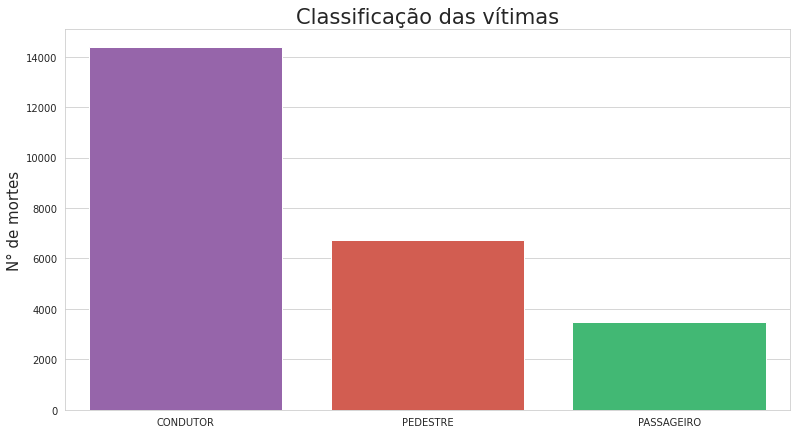

In [104]:
fig = plt.figure(figsize=(13,7))
y = df['Tipo de vítima'].count()
sns.countplot('Tipo de vítima',order=['CONDUTOR','PEDESTRE','PASSAGEIRO','NAO DISPONIVEL'],palette=paleta_tipo_vitima,data=df)
plt.xlim(-0.5,2.5)
plt.title('Classificação das vítimas',fontsize=21)
plt.xlabel(' ')
plt.ylabel('N° de mortes',fontsize=15);

Como podemos observar, os condutores morrem muito mais que os pedestres e os passageiros, mas ainda podemos FAZER MAIS (sempre dá para fazer mais), vamos os separar **por gênero**:

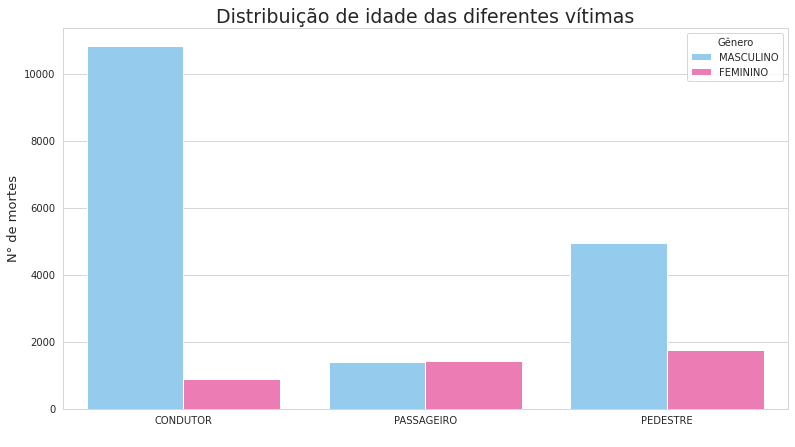

In [127]:
fig = plt.figure(figsize=(13,7))
sns.countplot('Tipo de vítima',hue='Sexo',palette=paleta_genero,data=df)
plt.xlabel(' ')
plt.xlim(-0.5,2.5)
plt.legend(title='Gênero')
plt.ylabel('N° de mortes',fontsize=13)
plt.title('Distribuição de idade das diferentes vítimas',fontsize=19);

Agora faremos mais ainda (eu avisei que sempre dava pra fazer mais), e analisaremos não a quantidade de mortes, mas a **idade das vítimas de cada classificação**, e novamente separadas por gênero.

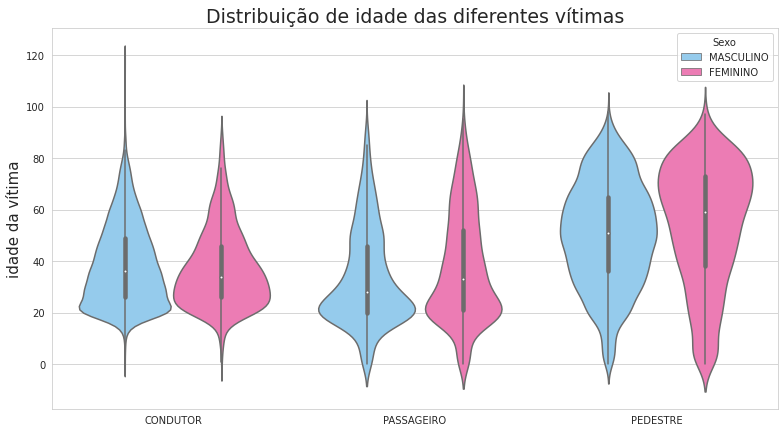

In [106]:
fig = plt.figure(figsize=(13,7))
sns.violinplot(x='Tipo de vítima',y='Idade da vítima',hue='Sexo',palette=paleta_genero,data=df)
plt.xlim(-0.5,2.5)
plt.title('Distribuição de idade das diferentes vítimas',fontsize=19)
plt.xlabel(' ')
plt.ylabel('idade da vítima',fontsize=15);

Como podemos observar, os jovens são os condutores que mais morrem, assim como os passageiros. Porém a distribuição dos pedestres se dá de maneira diferente, os mais velhos são os pedestres que mais morrem, na faixa de 40 a 60 anos.

Agora como eu disse antes, analisaremos os **veículos das vítimas**:

## Veículos das vítimas

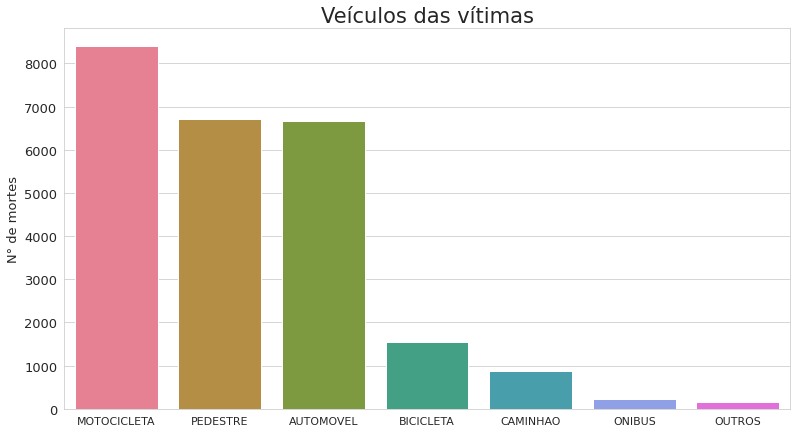

In [107]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(13,7))
sns.countplot('Tipo do veículo da vítima',order = df['Tipo do veículo da vítima'].value_counts().index,palette=paleta_tipo_veiculo,data=df)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Veículos das vítimas',fontsize=21)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.ylabel('N° de mortes',fontsize=13)
fig.savefig('Acidente_SP_veiculos.png');

In [108]:
tipo_porc = df['Tipo do veículo da vítima'].value_counts()/(df['Tipo do veículo da vítima'].value_counts().sum())*100
tipo_porc #Porcentagem dos tipos de veículos das vítimas

MOTOCICLETA    34.170466
PEDESTRE       27.356724
AUTOMOVEL      27.136926
BICICLETA       6.264246
CAMINHAO        3.533051
ONIBUS          0.932107
OUTROS          0.606480
Name: Tipo do veículo da vítima, dtype: float64

Observamos nessas análises que os motociclistam (34,5%) correm grande perigo no Estado de São Paulo, assim como os pedestres (28,2%) e quem viaja de automóvel (25,8%).

Agora separaremos novamente pelo gênero, para estudarmos as **idades das vítimas dado o tipo de veículo**

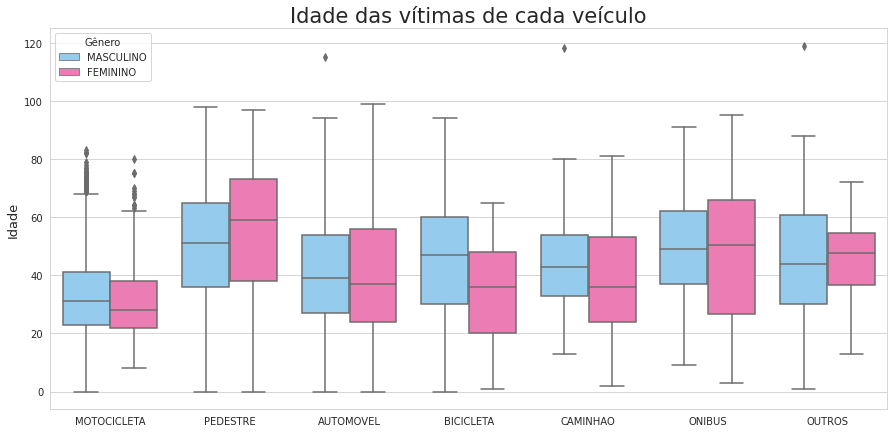

In [109]:
fig =plt.figure(figsize=(15,7))
sns.boxplot(x='Tipo do veículo da vítima',y='Idade da vítima',hue='Sexo',palette=paleta_genero,order=df['Tipo do veículo da vítima'].value_counts().index,data=df)
plt.title('Idade das vítimas de cada veículo',fontsize=21)
plt.xlabel(' ')
plt.ylabel('Idade',fontsize=13)
plt.legend(title='Gênero');

A partir desse gráfico conseguimos tirar algumas conclusões interessantes:

*   Os motociclistas costumam ser mais novos que os usuários de outros veículos. Isso pode nos ajudar a explicar o alto número de morte dos jovens nos acidentes de trânsito.
*   Os pedestres costumam ser mais velhos que os usuários de outros veículos. Mas ainda vemos muitos idosos (+65) morrendo de motocicletas em acidentes.

Agora que já conhecemos os perfis de quem morre nos acidentes de trânsito em SP, podemoms partir para a próxima etapa: **saber onde essas pessoas morrem**




# **ONDE ACONTECEM?**

---
Saber **onde** acontece é de suma importância quando estamos estudando um país, região, Estado (como é aqui no nosso caso), Município ou o que for. Estudar essa distribuição geográfica faz com que possamos nos localizar no conjunto de dados.


## Mapa

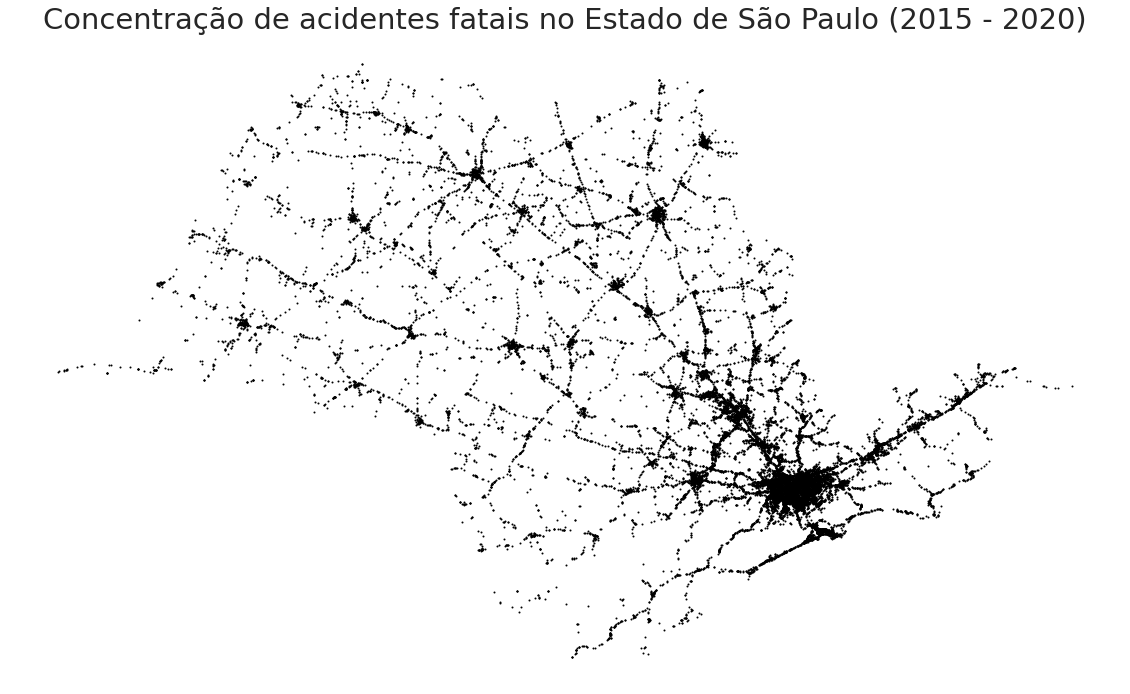

In [110]:
fig = plt.figure(figsize=(20,12))
plt.scatter(df['LONG_(GEO)'],df['LAT_(GEO)'], s=1,c='black')
plt.title('Concentração de acidentes fatais no Estado de São Paulo (2015 - 2020)',fontsize=29)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
sns.despine(left=True,bottom=True,right=True,top=True);

In [111]:
Municipio_com_mais = df['Município'].value_counts().head(5)
df['Município'].value_counts()/ df['Município'].value_counts().sum()*100
#print(f'Os municípios de Sâo Paulo com mais mortes decorridas de acidentes de trânsito (2015-2020):\n{Municipio_com_mais}')

SAO PAULO                 16.497069
CAMPINAS                   2.531749
GUARULHOS                  2.193911
SOROCABA                   1.640345
RIBEIRAO PRETO             1.534516
                            ...    
OURO VERDE                 0.004070
DOLCINOPOLIS               0.004070
SAO JOAO DO PAU D ALHO     0.004070
ITAJU                      0.004070
MARABA PAULISTA            0.004070
Name: Município, Length: 632, dtype: float64

## Vias
Agora que já sabemos onde as mortes se concentram, veremos 2 tipos comuns de vias: As vias municipais e as rodoviais. Onde acontecem mais mortes por acidentes?

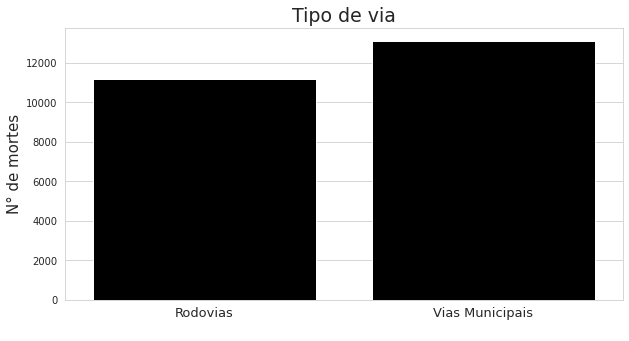

In [112]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Tipo de via',color='black',data=df)
plt.title('Tipo de via',fontsize=19)
plt.ylabel('N° de mortes',fontsize=15)
plt.xlabel(' ')
plt.xlim(-0.5,1.5)
plt.xticks(fontsize=13);

As vias municipais se mostram mais perigosas do que as rodovias, mas podemos fazer outra pergunta: mais perigosa **para quem?**

Nos seguintes gráficos, separaremos os números de mortes nas vias municipais e nas rodovias por:

*   Gênero
*   Tipo de vítima
*   Veículo da vítima



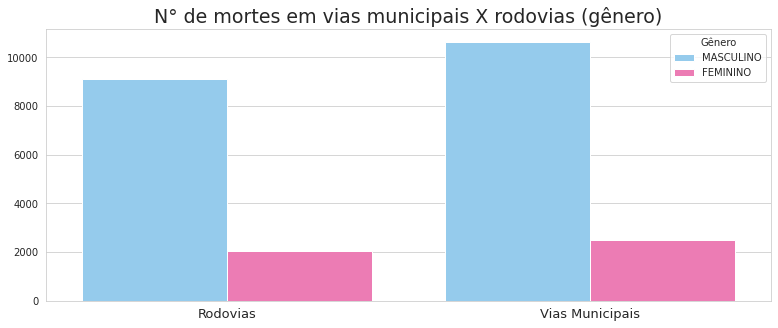

In [113]:
fig = plt.figure(figsize=(13,5))
sns.countplot('Tipo de via',hue='Sexo',palette=paleta_genero,data=df)
plt.xlim(-0.5,1.5)
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=13)
plt.title('N° de mortes em vias municipais X rodovias (gênero)',fontsize=19)
plt.legend(title='Gênero', loc='upper right', labels=['MASCULINO', 'FEMININO']);

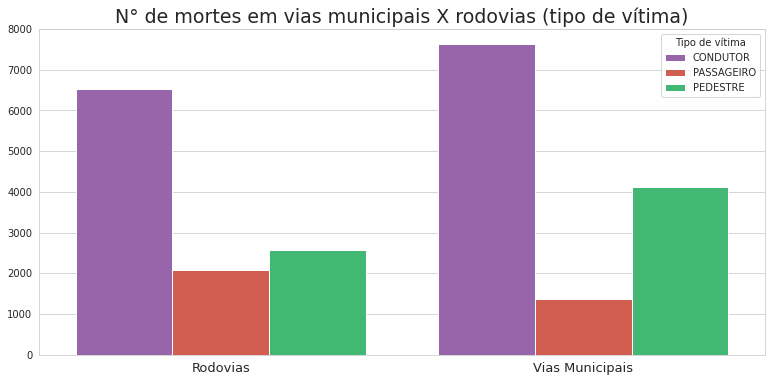

In [114]:
fig = plt.figure(figsize=(13,6))
sns.countplot('Tipo de via',hue='Tipo de vítima',palette=paleta_tipo_vitima,data=df)
plt.xlim(-0.5,1.5)
plt.xlabel('',fontsize=13)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.title('N° de mortes em vias municipais X rodovias (tipo de vítima)',fontsize=19)
plt.legend(title='Tipo de vítima', loc='upper right', labels=['CONDUTOR', 'PASSAGEIRO','PEDESTRE']);

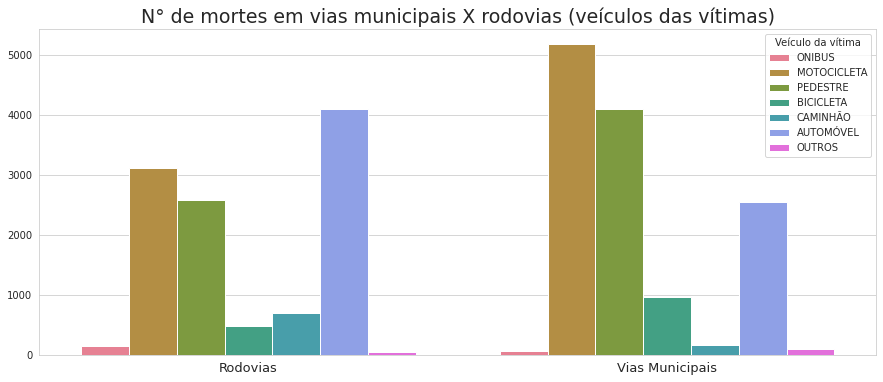

In [115]:
fig = plt.figure(figsize=(15,6))
sns.countplot('Tipo de via',hue='Tipo do veículo da vítima',palette=paleta_tipo_veiculo,data=df)
plt.xlim(-0.5,1.5)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=13)
plt.title('N° de mortes em vias municipais X rodovias (veículos das vítimas)',fontsize=19)
plt.legend(title='Veículo da vítima', loc='upper right', labels=['ONIBUS', 'MOTOCICLETA','PEDESTRE','BICICLETA','CAMINHÃO','AUTOMÓVEL','OUTROS']);

No terceiro gráfico vemos um resultado interessante. Embora o número de motociclistas tenha sido maior que o de automóveis, nas rodovias não acontece isso. O número de mortes com automóveis se mostra maior do que com motocicletas.

Entender onde as pessoas morrem informam aos formuladores de políticas públicas onde devem atuar para reduzir os números de acidentes. Traçar planos eficientes são necessários para atacar o problema, e devemos fazer isso nos baseando em dados estatísticos.

Agora iremos explorar a relação temporal. Estudaremos, então, **quando** essas mortes acontecem.

# **QUANDO ACONTECEM?**

---
Localizar eventos na dimensão temporal nos permite traçar um panorama diferente, pois o tempo é uma informação que vemos o tempo todo, deixá-lo de lado é excluir uma parte crucial da sua análise. Pensar em problemas inclui pensar no "**quando** aconteceu".


## Mês do ano

In [116]:
df['Mês do Óbito'].value_counts()

3     2297
4     2173
12    2158
7     2090
10    2032
5     2030
8     2026
1     2000
6     1999
9     1982
2     1953
11    1828
Name: Mês do Óbito, dtype: int64

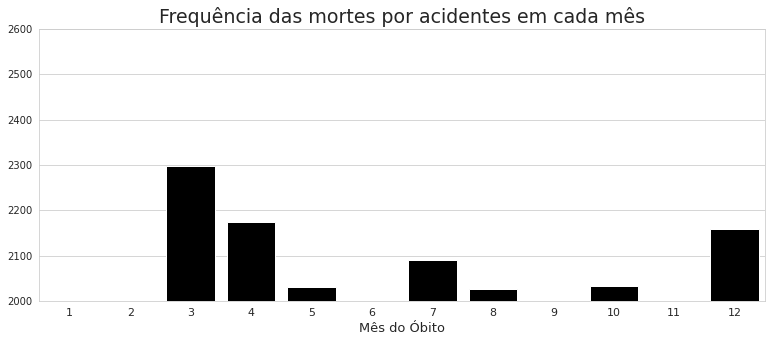

In [117]:
#Agora interpretando no gráfico
fig = plt.figure(figsize=(13,5))
plt.title('Frequência das mortes por acidentes em cada mês',fontsize=19)
sns.countplot('Mês do Óbito',color='black',data=df)
plt.ylim(2000,2600)
plt.ylabel('')
plt.xlabel('Mês do Óbito',fontsize=13)
plt.xticks(fontsize=11);

## Dias da semana e turnos do dia
Agora que sabemos o mês em que mais ocorreram mortes, iremos analisar quais os **dias da semana e turnos do dia** essas mortes constumam ocorrer.

In [118]:
#Porcentagem de morte por turno
#df['Turno'].value_counts()/df['Turno'].value_counts().sum()*100
df['Dia da Semana'].value_counts()/df['Dia da Semana'].value_counts().sum()*100

DOMINGO    19.834744
SÁBADO     19.492836
SEXTA      14.205471
QUINTA     12.312765
SEGUNDA    12.149951
QUARTA     11.335884
TERÇA      10.668349
Name: Dia da Semana, dtype: float64

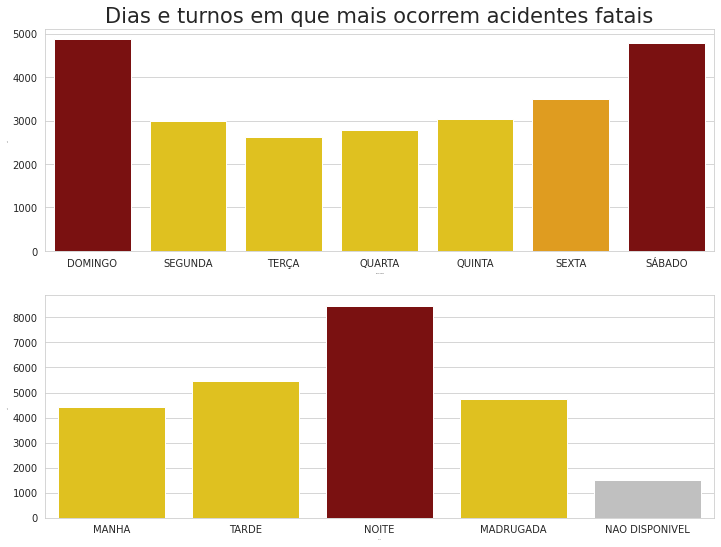

In [119]:

fig = plt.figure(figsize=(12,9))
plt.subplot(2,1,2)
plt.xlabel(' ',fontsize=1)
plt.ylabel(' ',fontsize=1)
turnos = df['Turno'].value_counts()
sns.countplot('Turno',order=['MANHA','TARDE','NOITE','MADRUGADA','NAO DISPONIVEL'],palette=cores_hora,data=df)
plt.subplot(2,1,1)
plt.title('Dias e turnos em que mais ocorrem acidentes fatais',fontsize=21)
plt.xlabel(' ',fontsize=1)
plt.ylabel(' ',fontsize=1)
sns.countplot('Dia da Semana',order=['DOMINGO','SEGUNDA','TERÇA','QUARTA','QUINTA','SEXTA','SÁBADO'],palette=cores_dia,data=df);

In [120]:
df['Tempo entre o Acidente e o óbito'].value_counts()/df['Tempo entre o Acidente e o óbito'].value_counts().sum()*100

Mesmo dia          82.066102
Até 7 dias          6.028167
Até 30 dias         4.619831
Dia anterior        3.952296
Mais de 30 dias     3.333605
Name: Tempo entre o Acidente e o óbito, dtype: float64

Agora que já compeendemos quando acontecem os acidentes, podemos levar para escolhas individuais, como evitar sair em certos dias e horários, e para elaboração de políticas públicas, como fiscalizações em determinados dias e horários.

# **COMO ACONTECEM?**

---



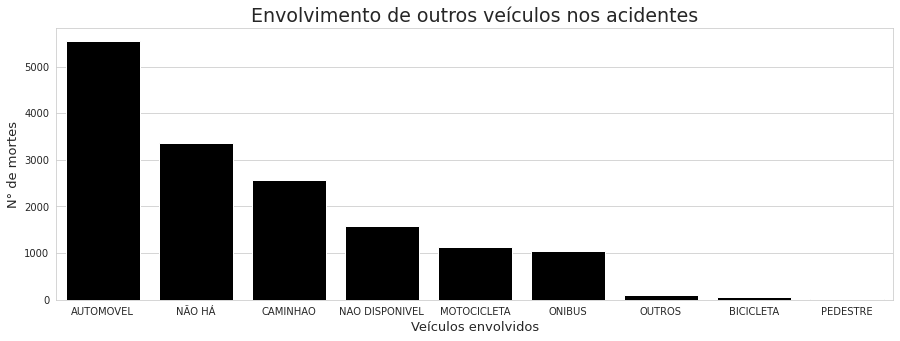

In [121]:
fig = plt.figure(figsize=(15,5))
sns.countplot('Outro Veículo Envolvido',order=df['Outro Veículo Envolvido'].value_counts().index,color='black',data=df)
plt.ylabel('')
plt.xlabel('Veículos envolvidos',fontsize=13)
plt.ylabel('N° de mortes',fontsize=13)
plt.title('Envolvimento de outros veículos nos acidentes',fontsize=19);

In [122]:
#Porcentagem de cada veículo envolvido
df['Outro Veículo Envolvido'].value_counts()/df['Outro Veículo Envolvido'].value_counts().sum()*100

AUTOMOVEL         36.007269
NÃO HÁ            21.748442
CAMINHAO          16.647196
NAO DISPONIVEL    10.267394
MOTOCICLETA        7.359813
ONIBUS             6.769211
OUTROS             0.674974
BICICLETA          0.389408
PEDESTRE           0.136293
Name: Outro Veículo Envolvido, dtype: float64

In [123]:
#Quando há acidente, qual a porcentagem?
df_remove_envolvido = df.loc[(df['Outro Veículo Envolvido'] == 'NÃO HÁ')]
df = df.drop(df_remove_envolvido.index)
df['Outro Veículo Envolvido'].value_counts()/df['Outro Veículo Envolvido'].value_counts().sum()*100

AUTOMOVEL         46.014763
CAMINHAO          21.273949
NAO DISPONIVEL    13.121009
MOTOCICLETA        9.405325
ONIBUS             8.650576
OUTROS             0.862569
BICICLETA          0.497636
PEDESTRE           0.174173
Name: Outro Veículo Envolvido, dtype: float64

In [124]:
# Porcentagem do tipo de aciednte
df['Tipo de acidente'].value_counts()/df['Tipo de acidente'].value_counts().sum()*100

COLISAO          46.113965
ATROPELAMENTO    32.233586
CHOQUE           10.859217
OUTROS           10.793232
Name: Tipo de acidente, dtype: float64

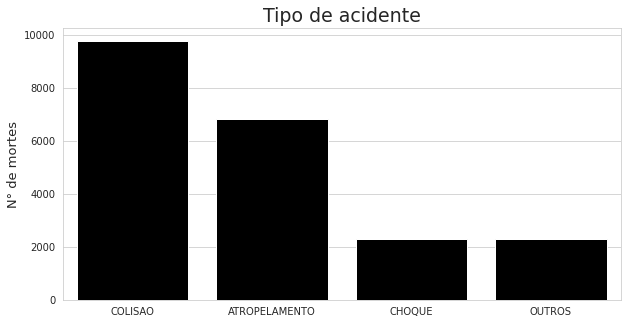

In [125]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Tipo de acidente',order=df['Tipo de acidente'].value_counts().index,color='black',data=df)
plt.ylabel('N° de mortes',fontsize=13)
plt.xlabel('')
plt.title('Tipo de acidente',fontsize=19);

In [133]:
df['Sub Tipo do Acidente'].value_counts()/df['Sub Tipo do Acidente'].value_counts().sum()*100
df['Sub Tipo do Acidente'].value_counts().head()

FRONTAL           1631
CRUZANDO A VIA    1579
TRASEIRA          1052
LATERAL            893
TRANSVERSAL        614
Name: Sub Tipo do Acidente, dtype: int64

# **CONCLUSÕES**

---



## Conclusão dos dados

Alguns dados relevantes:

*   Os homens representaram **81.72%** das mortes;

*   Os condutores corresponderam a **54.46%** das mortes;

*   Os condutores e passageiros costumam ser jovens, enquanto os pedestres costumam ser mais velhos;

*   As vias municipais tiveram mais mortes que as rodovias
*   O mês de março obteve o maior número de mortos;


*   **80%** dos acidentes fatais resultaram em morte no mesmo  dia;
*   O município com mais mortes é a capital, com 4120 mortes nesse período de 5 anos, correspondendo a **17,3%**;

*   Ocorreramm mais mortes nos finais de semana do que dos dias de semana (**19,04%** no sábado e **18,86%** no domingo);


*   A noite se mostrou muito mais perigosa que os outros turnos do dia (**35,4%** das mortes ocorreram na noite);


*  Aproximadamente **65%** dos acidentes tinham outro veículo envolvido. E quando tinham, **43,6%** possuíam envolvimento de automóvel;


*   O tipo mais comum desses acidentes (**45,5%**) foi choque, o segundo foi atropelamento(**34.8%**)
*    **22.2%** foram acidentes frontais, enquanto **21.5%** ocorreram em cruzamento de vias.




##Conclusão final
Ter conhecimento do que acontece no nosso dia-a-dia é essencial não só para compreendermos nossa sociedade, mas para nos sentirmos inseridos nela. Analisar os fenômenos (por mais trágicos que sejam) através de dados, gráficos e modelos faz parte dessa compreensão e, por isso, os dados devem estar claros e os gráficos coesos, pois precisam ser entendidos e pra isso precisam ser **entendíveis**.

Cabe aos cidadãos e aos órgãos públicos (mais a esses) o dever te conscientizar que o trânsito deve ser conduzido com responsabilidade. Porque educação no trânsito não se adquire apenas nas auto escolas, mas também em uma comunidade ciente da necessidade da seriedade do assunto.

Segundo o Observatório de Segurança Viária, 90% dos acidentes são relacionados ao comportamento do motorista. E não adianta apenas ter estradas novas, fiscalizações e carros mais seguros.

> *“Se houver uma falha humana, tanto a rodovia, quanto o veículo, eles estão ali para auxiliar e mitigar a lesão fatal ao ocupante. Se nós não trabalharmos a questão da educação, do comportamento da sociedade, nós vamos continuar a ter taxas elevadas de mortes no trânsito”*, afirma José Aurélio Ramalho.

https://www.onsv.org.br/90-dos-acidentes-sao-causados-por-falhas-humanas-alerta-observatorio/

